In [1]:
import numpy as np
import scipy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
import astropy.io.ascii as asci
from helper import phys

In [2]:
from helper.specread import get_keck, gaplinelist, get_hstspec, get_p200, get_ltspec
from helper.specread import add_telluric_circle
from helper.specplot_func import get_vvyy, add_tick,  plot_mask_gal_lines, measure_line_index, measure_abs_velocity, measure_FWHM
from allsn_info import get_at2019dge

In [4]:
import matplotlib
import matplotlib.pyplot as plt
fs= 10
matplotlib.rcParams['font.size']=fs

%matplotlib notebook

In [5]:
result = get_at2019dge()

In [6]:
z =result["z"]
t0max = result["t_max"]
ebv = result["ebv"]# galactic extinction
lc = result['tb']
lc = lc[lc.instrument!='P60+SEDM']
lcdet = lc.sort_values(by = ['mjd'])

In [7]:
dt1 = get_keck(z=z, date = "20190412_Keck1_v2", vkernel = 200)
dt0 = get_keck(z=z, date = "20190704_Keck1_v1", vkernel = 200)
dt7 = get_keck(z=z, date = "20190928_Keck1_v1", vkernel = 200)
dt6 = get_keck(z=z, date = "20190831_Keck1_v1", vkernel = 200)
dt8 = get_keck(z=z, date = "20200218_Keck1_v2", vkernel = 200)
dt3 = get_ltspec(date = '0410', z=z)
dt4 = get_ltspec(date = '0409', z=z)
dt2 = get_p200(z=z)
dt5 = get_hstspec(z=z)

/Users/yuhanyao/Documents/GitHub/AT2019dge/playground/helper/specread.py:294: RuntimeWarning: invalid value encountered in log
  dt["ln_spec_obs"] = np.log(dt['spec_obs0'])
/Users/yuhanyao/Documents/GitHub/AT2019dge/playground/helper/specread.py:350: RuntimeWarning: invalid value encountered in log
  dt["ln_spec_obs"] = np.log(dt['spec_obs0'])


In [8]:
yaolist = gaplinelist(z=0)
H_list = yaolist['H_list']
FeII_list = yaolist['FeII_list']
HeI_list = yaolist['HeI_list']
HeII_list = yaolist['HeII_list']
OIII_list = yaolist['OIII_list']
OII_list = yaolist['OII_list']
OI_list = yaolist['OI_list']
SIII_list = yaolist['SIII_list']
SII_list = yaolist['SII_list']
NII_list = yaolist['NII_list']
CaII_list = yaolist['CaII_list']
NeIII_list = yaolist['NeIII_list']
ArIII_list = yaolist["ArIII_list"]
MgII_list = yaolist["MgII_list"]
CIII_list = yaolist["CIII_list"]
NIII_list = yaolist["NIII_list"]

## Make spectra figure
Present observed flux.

### Early Time

In [9]:
def major_plots(ax):
    xtext = 7850
    
    off4 = +3.6
    ax.plot(dt4['wave_rest'], dt4['ln_spec_obs']+off4, 'k', alpha = 0.1)
    ax.plot(dt4['wave_con'][2:], dt4['ln_spec_con'][2:]+off4, 'k', alpha = 1, zorder = 2)
    ax.text(xtext, -34.1, 'LT, $-%.1f$'%abs(dt4["phase"]))

    off3 = +2.6
    ax.plot(dt3['wave_rest'], dt3['ln_spec_obs']+off3, 'k', alpha = 0.1)
    ax.plot(dt3['wave_con'][2:], dt3['ln_spec_con'][2:]+off3, 'k', alpha = 1, zorder = 2)
    ax.text(xtext, -35.3, 'LT, $-%.1f$'%abs(dt3["phase"]))
    
    # LRIS
    off1 = +0.2
    ax.plot(dt1['wave_rest'], dt1['ln_spec_obs']+off1, 'k', alpha = 0.1)
    ax.plot(dt1['wave_con'], dt1['ln_spec_con']+off1, 'k', alpha = 1, zorder = 2)
    ax.text(xtext-200, -36.5, 'LRIS, $+%.1f$'%dt1["phase"])

    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.set_xlabel('Rest Wavelength ('+r'$\AA$'+')')
    ax.set_ylabel('ln'+r'$f_{\lambda}$'+' + Const')

    ax.set_ylim(-37, -32.)
    ax.set_xlim(3200, 8600)
    
    add_telluric_circle(ax, 6782, -33.6, rx=40*1.1, ry = 0.07*4/5, ls=0.8)
    add_telluric_circle(ax, 7450, -33.7, rx=40*1.1, ry = 0.07*4/5, ls=0.8)

    tup = -32.6
    xoff = -50
    yoff = 0.05
    color= "grey"
    ax.plot([H_list[-3], H_list[-3]], [-35.5, tup], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.plot([H_list[-2], H_list[-2]], [-35.7, tup], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.plot([H_list[-1], H_list[-1]], [-36.5, tup], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.text(H_list[-3]+xoff, tup+yoff, "H"+r"$\gamma$", rotation=90, fontsize = fs-2)
    ax.text(H_list[-2]+xoff*1.6, tup+yoff, "H"+r"$\beta$", rotation=90, fontsize = fs-2)
    ax.text(H_list[-1]+xoff*1.6, tup+yoff, "H"+r"$\alpha$", rotation=90, fontsize = fs-2)
    
    ax.plot([OIII_list[1], OIII_list[1]], [-36., tup], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.plot([OIII_list[2], OIII_list[2]], [-36., tup], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.text(OIII_list[1]+xoff, tup+yoff, "[O III]", rotation=90, fontsize = fs-2)
    ax.text(OIII_list[2]+xoff*(-0.2), tup+yoff, "[O III]", rotation=90, fontsize = fs-2)

    #ax.plot([NII_list[1], NII_list[1]], [-36.6, tup-0.3], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    #ax.text(NII_list[1]+xoff*(-0.2), tup+yoff-0.3, "[N II]", rotation=90, fontsize = fs-2)

    ax.plot([SII_list[0], SII_list[0]], [-36.6, tup-0.8], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.plot([SII_list[1], SII_list[1]], [-36.6, tup-0.8], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.text(SII_list[1]+xoff, tup+yoff-0.8, "[S II]", rotation=90, fontsize = fs-2)
    
    ax.plot([NeIII_list[0], NeIII_list[0]], [-35.5, tup-2], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.text(NeIII_list[0]+xoff, tup+yoff-2, "[Ne III]", rotation=90, fontsize = fs-2)

    ax.plot([OII_list[0], OII_list[0]], [-35.5, tup-1.5], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.plot([OII_list[1], OII_list[1]], [-35.5, tup-1.5], color=color, linestyle='-.', linewidth = 0.8, zorder = 1)
    ax.text(OII_list[0]+xoff, tup+yoff-1.5, "[O II]", rotation=90, fontsize = fs-2)
    
    # flash features
    ax.plot([HeII_list[0], HeII_list[0]], [-36., tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeII_list[-0]+xoff*1.6, tup+yoff, "He II", rotation=90, fontsize = fs-1, color = "darkcyan")

    ax.plot([HeI_list[2], HeI_list[2]], [-36.3, tup-0.5], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeI_list[2]+xoff*1.6, tup+yoff-0.5, "He I", rotation=90, fontsize = fs-1, color = "darkcyan")



In [10]:
def minor_plot2(ax):
    wv = HeI_list[2]
    vv4, yy4 = get_vvyy(dt4, wv)
    vv3, yy3 = get_vvyy(dt3, wv)
    vv1, yy1 = get_vvyy(dt1, wv)
    
    multi = 1e+16
    
    ax.plot(vv4, yy4*multi*2+1.8, 'k', zorder=2)
    ax.plot(vv3, yy3*multi*2+0.5, 'k', zorder=2)
    ax.plot(vv1, yy1*multi*2-3., 'k', zorder=2)
    ax.plot([0,0], [0,4], linestyle = '--', color = "darkcyan", zorder = 0)
    ax.set_xlim(-3800, 3200)
    ax.set_ylim(-0, 4.6)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(400))
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    ax.text(-2000, 4.1, "He I "+r'$\lambda5876$')

In [11]:
def minor_plot3(ax):
    wv = H_list[-1]
    vv4, yy4 = get_vvyy(dt4, wv)
    vv3, yy3 = get_vvyy(dt3, wv)
    vv1, yy1 = get_vvyy(dt1, wv)
    
    multi = 1e+16
    
    ax.plot(vv4, yy4*multi*0.5+3, 'k', zorder=2)
    ax.plot(vv3, yy3*multi*0.5+2.2, 'k', zorder=2)
    ax.plot(vv1, yy1*multi*0.5-0.5, 'k', zorder=2)
    add_tick(ax, wv, NII_list[-1], t1 = 0.45, t2 = 0.65)
    ax.plot([0,0], [0,4], linestyle = '--', color = "darkcyan", zorder = 0)
    ax.text(600, 0.7, '[N II]')
    ax.set_xlim(-3800, 3200)
    ax.set_ylim(-0, 4.6)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(400))
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    ax.text(-400, 4.1, "H"+r'$\alpha$')
    
    ax2 = ax.twinx() 
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.set_ylabel(r"$f_{\lambda}$"+" + Const")

In [12]:
def minor_plot1(ax):
    wv = HeII_list[0]
    vv4, yy4 = get_vvyy(dt4, wv)
    vv3, yy3 = get_vvyy(dt3, wv)
    vv1, yy1 = get_vvyy(dt1, wv)
    
    multi = 1e+16
    
    ax.plot(vv4, yy4*multi*1.3+1.6, 'k', zorder=2)
    ax.plot(vv3, yy3*multi*1.3+0.6, 'k', zorder=2)
    ax.plot(vv1, yy1*multi*1.3-3.8, 'k', zorder=2)
    add_tick(ax, wv, NIII_list, t1 = 1.0, t2 = 1.2)
    add_tick(ax, wv, CIII_list, t1 = 0.85, t2 = 1.05)
    ax.text(-3600, 1.25, "N III")
    ax.text(-2750, 1.1, "C III")
    ax.plot([0,0], [0,4], linestyle = '--', color = "darkcyan", zorder = 0)
    ax.set_xlim(-3800, 3200)
    ax.set_ylim(-0, 4.6)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(400))
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    ax.text(-2000, 4.1, "He II "+r'$\lambda4686$')

#### Show flash/CSM features

In [13]:
fs= 10
matplotlib.rcParams['font.size']=fs

<IPython.core.display.Javascript object>


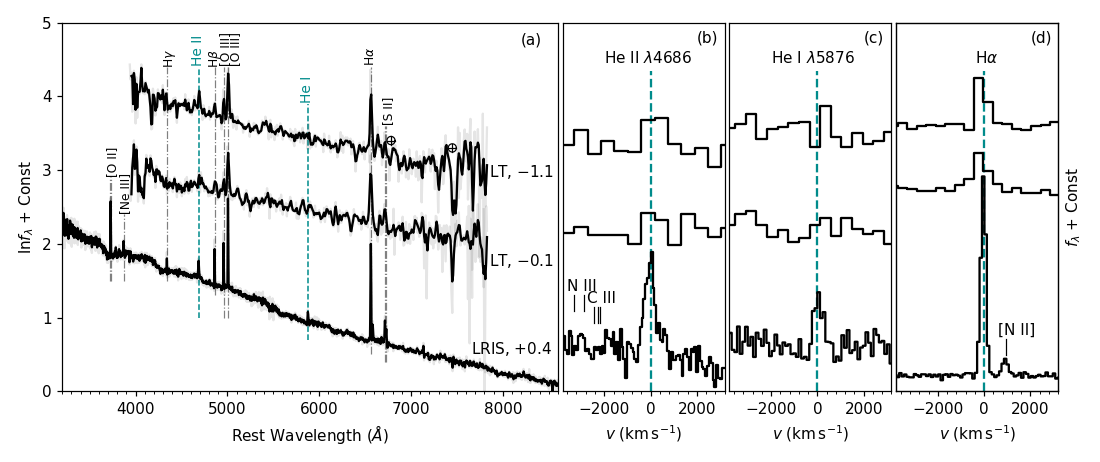

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


In [14]:
fig = plt.figure(figsize=(10, 4.2))
gs = fig.add_gridspec(nrows=1, ncols=6)
ax = fig.add_subplot(gs[0, 0:3]) 
ax1 = fig.add_subplot(gs[0, 3]) 
ax2 = fig.add_subplot(gs[0, 4]) 
ax3 = fig.add_subplot(gs[0, 5]) 

major_plots(ax)
minor_plot1(ax1)
minor_plot2(ax2)
minor_plot3(ax3)

ax.text(8200, -32.3, "(a)", color = "k")
ax1.text(2000, 4.35, "(b)", color = "k")
ax2.text(2000, 4.35, "(c)", color = "k")
ax3.text(2000, 4.35, "(d)", color = "k")

ax.set_yticklabels([0,1,2,3,4,5])
plt.tight_layout(w_pad=-0.6)
plt.savefig('../paper/figures/spectra_early.pdf')

He II: (246 + 304) <br>
He I: (340 + 234) <br>
H alpha: (116 + 199) <br>

In [15]:
print ("LT resoltuion")
print (18 / 6563 * 3e+5, "km/s")

LT resoltuion
822.7944537559042 km/s


In [16]:
print ("LRIS resoltuion")
print (6 / 6563 * 3e+5, "km/s")

LRIS resoltuion
274.2648179186348 km/s


In [17]:
print ("DBSP resoltuion on blue side")
print (3 / 6563 * 3e+5, "km/s")

DBSP resoltuion on blue side
137.1324089593174 km/s


In [18]:
print ("DBSP resoltuion on red side")
print (5 / 6563 * 3e+5, "km/s")

DBSP resoltuion on red side
228.55401493219566 km/s


## Photosperic phase (broad line)

In [19]:
def phot_minor1(ax):
    wv = HeI_list[2]
    vv5, yy5 = get_vvyy(dt5, wv)
    vv2, yy2 = get_vvyy(dt2, wv)
    
    multi = 2e+16
    
    ax.plot(vv5, yy5*multi*1.2+0.8, 'k', zorder=2)
    ax.plot(vv2, yy2*multi*0.8-2.2, 'k', zorder=2)
    
    ax.set_xlim(-12000, 12000)
    ax.set_ylim(0, 3)
    ax.plot([0,0], [0, 2.5], linestyle = '--', color = "darkcyan", zorder = 0)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1000))
    
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    ax.text(-2000, 2.7, "He I "+r'$\lambda5876$')
    
    ax2 = ax.twinx() 
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.set_ylabel(r"$f_{\lambda}$"+" + Const")

In [20]:
def phot_major(ax):
    xoff = -50
    yoff = 0.05
    
    # HST
    ax.plot(dt5["wave_rest"][:-25], dt5["ln_spec_obs"][:-25]*0.8-7., 'k', zorder = 6)
    ax.text(8000, -38, 'HST, $+%.1f$'%abs(dt5["phase"]))
    
    # DBSP
    off2 = -1.9
    ax.plot(dt2['wave_rest'], dt2['ln_spec_obs']+off2, 'k', alpha = 0.1)
    ax.plot(dt2['wave_con'], dt2['ln_spec_con']+off2, 'k', alpha = 1)
    plot_mask_gal_lines(ax, dt2['wave_rest'], dt2['ln_spec_obs']+off2, plotfinal = False)
    plot_mask_gal_lines(ax, dt2['wave_con'], dt2['ln_spec_con']+off2, plotfinal=True)
    ax.text(2000, -38.3, 'DBSP, $+%.1f$'%dt2["phase"])

    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.set_xlabel('Rest Wavelength ('+r'$\AA$'+')')
    ax.set_ylabel('ln'+r'$f_{\lambda}$'+' + Const')
    
    ax.set_ylim(-39.1, -36.3)
    ax.set_xlim(1900, 9800)
    
    ax.set_yticks([-39.1, -38.1, -37.1])
    ax.set_yticklabels([0, 1, 2])
    
    tup = -36.7
    ax.plot([HeI_list[2], HeI_list[2]], [-38.7, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeI_list[2]+xoff*1.6, tup+yoff, "He I", rotation=90, fontsize = fs-1, color = "darkcyan")


<IPython.core.display.Javascript object>


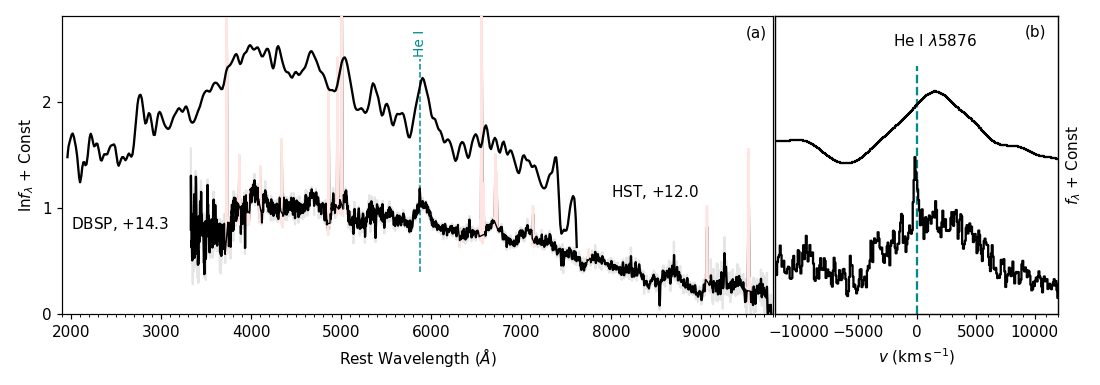

In [21]:
fig = plt.figure(figsize=(10, 3.5))
gs = fig.add_gridspec(nrows=1, ncols=7)
ax = fig.add_subplot(gs[0, 0:5]) 
ax1 = fig.add_subplot(gs[0, 5:]) 

phot_major(ax)
phot_minor1(ax1)

ax.text(9500, -36.5, "(a)", color = "k")
ax1.text(9200, 2.8, "(b)", color = "k")

plt.tight_layout(w_pad=-0.6)
plt.savefig('../paper/figures/spectra_phot.pdf')

In [34]:
def late_major(ax):
    # LRIS
    xtext = 3500
    off0 = -3.2
    ax.plot(dt0['wave_rest'], dt0['ln_spec_obs']+off0, 'k', alpha = 0.1)
    ax.plot(dt0['wave_con'], dt0['ln_spec_con']+off0, 'k', alpha = 1)
    plot_mask_gal_lines(ax, dt0['wave_rest'], dt0['ln_spec_obs']+off0, plotfinal = False)
    plot_mask_gal_lines(ax, dt0['wave_con'], dt0['ln_spec_con']+off0, plotfinal=True)
    ax.text(xtext, -40., 'LRIS, $+%.1f$'%dt0["phase"], zorder = 6)
    
    # LRIS
    off6 = -4.3
    ax.plot(dt6['wave_rest'], dt6['ln_spec_obs']+off6, 'k', alpha = 0.1)
    ax.plot(dt6['wave_con'], dt6['ln_spec_con']+off6, 'k', alpha = 1)
    plot_mask_gal_lines(ax, dt6['wave_rest'], dt6['ln_spec_obs']+off6, plotfinal = False)
    plot_mask_gal_lines(ax, dt6['wave_con'], dt6['ln_spec_con']+off6, plotfinal=True)
    ax.text(xtext, -40.9, 'LRIS, $+%.1f$'%dt6["phase"], zorder = 6)
    
    
    # LRIS
    off7 = -5.3
    ax.plot(dt7['wave_rest'], dt7['ln_spec_obs']+off7, 'k', alpha = 0.1)
    ax.plot(dt7['wave_con'], dt7['ln_spec_con']+off7, 'k', alpha = 1)
    plot_mask_gal_lines(ax, dt7['wave_rest'], dt7['ln_spec_obs']+off7, plotfinal = False)
    plot_mask_gal_lines(ax, dt7['wave_con'], dt7['ln_spec_con']+off7, plotfinal=True)
    ax.text(xtext, -41.8, 'LRIS, $+%.1f$'%dt7["phase"], zorder = 6)
    
    # LRIS
    off8 = -5.8
    ax.plot(dt8['wave_rest'], dt8['ln_spec_obs']+off8, 'k', alpha = 0.1)
    ax.plot(dt8['wave_con'], dt8['ln_spec_con']+off8, 'k', alpha = 1)
    plot_mask_gal_lines(ax, dt8['wave_rest'], dt8['ln_spec_obs']+off8, plotfinal = False)
    plot_mask_gal_lines(ax, dt8['wave_con'], dt8['ln_spec_con']+off8, plotfinal=True)
    ax.text(xtext, -43., 'LRIS, $+%.1f$'%dt8["phase"], zorder = 6)

    #ax.semilogx()
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    ax.set_xlim(3300, 9400)
    ax.set_xlabel('Rest Wavelength ('+r'$\AA$'+')')
    ax.set_ylabel('ln'+r'$f_{\lambda}$'+' + Const')
    
    add_telluric_circle(ax, 7450, -42., rx=40*1.3, ry = 0.07*4/5, ls=0.8)
    
    tup = -40.1
    tbottom = -44.5
    xoff = -50
    yoff = 0.06
    ax.plot([OI_list[1], OI_list[1]], [tbottom, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.plot([OI_list[2], OI_list[2]], [tbottom, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(OI_list[1]+xoff, tup+yoff, "[O I]", rotation=90, fontsize = fs-1, color = "darkcyan")
    
    ax.plot([CaII_list[2], CaII_list[2]], [tbottom, tup-0.1], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.plot([CaII_list[3], CaII_list[3]], [tbottom, tup-0.1], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(CaII_list[3]+xoff*1.6, tup+yoff-0.1, "[Ca II]", rotation=90, fontsize = fs-1, color = "darkcyan")
    
    ax.plot([HeI_list[2], HeI_list[2]], [tbottom, tup], color='forestgreen', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeI_list[2]+xoff*1.6, tup+yoff, "He I", rotation=90, fontsize = fs-1, color = "forestgreen")

    ax.plot([HeI_list[3], HeI_list[3]], [tbottom, tup], color='b', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeI_list[3]+xoff*1.6, tup+yoff, "He I", rotation=90, fontsize = fs-1, color = "b", zorder = 6)

    ax.plot([HeI_list[4], HeI_list[4]], [tbottom, tup], color='crimson', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(HeI_list[4]+xoff*1.6, tup+yoff, "He I", rotation=90, fontsize = fs-1, color = "crimson", zorder = 6)

    ax.plot([CaII_list[4], CaII_list[4]], [tbottom, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.plot([CaII_list[5], CaII_list[5]], [tbottom, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.plot([CaII_list[6], CaII_list[6]], [tbottom, tup], color='darkcyan', linestyle='--', linewidth = 1., zorder = 1)
    ax.text(CaII_list[5]+xoff, tup+yoff, "Ca II", rotation=90, fontsize = fs-1, color = "darkcyan")
    
    ax.set_ylim(-44.3, -39.6)
    #ax.set_yticks([-44.3, -43.3, -42.3, -41.3, -40.3])
    #ax.set_yticklabels([0,1,2,3,4,5])

In [35]:
def late_minor2(ax):
    wv = OI_list[1]
    vv0, yy0 = get_vvyy(dt0, wv)
    vv6, yy6 = get_vvyy(dt6, wv, binning = 2)
    vv7, yy7 = get_vvyy(dt7, wv, binning = 3)
    vv8, yy8 = get_vvyy(dt8, wv, binning = 1)
    
    multi = 1e+16
    
    ax.plot(vv0, yy0*multi+0.5, 'k', zorder=2)
    ax.plot(vv6, yy6*multi, 'k', zorder=2)
    ax.plot(vv7, yy7*multi-0.5, 'k', zorder=2)
    ax.plot(vv8, yy8*multi-0.3, 'k', zorder=2)
    
    ax.set_xlim(-1500, 3900)
    ax.set_ylim(-0., 1.45)
    ax.xaxis.set_major_locator(plt.MultipleLocator(2000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(500))
    
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    
    ax.plot([0,0], [0, 1.25], linestyle = '--', color = "darkcyan", zorder = 0)
    v1 = (OI_list[2]- wv)/wv * phys.c /1e+5
    ax.plot([v1,v1], [0, 1.25], linestyle = '--', color = "darkcyan", zorder = 0)
    
    ax.text(900, 1.35, "[O I]")
    ax.text(-1200, 1.28, r'$\lambda6300$')
    ax.text(1800, 1.28, r'$\lambda6363$')
    
    add_tick(ax, wv, SIII_list[0], 0.84, 0.89)
    ax.text(200, 0.9, "[S III]")

In [36]:
def late_minor1(ax):
    
    # line 1
    multi = 1e+16
    wv = HeI_list[2]
    vv0, yy0 = get_vvyy(dt0, wv)
    vv6, yy6 = get_vvyy(dt6, wv, binning = 1)
    vv7, yy7 = get_vvyy(dt7, wv, binning = 3)
    vv8, yy8 = get_vvyy(dt8, wv, binning = 1)
    
    yoff0 = 3-0.2
    yoff6 = 2-0.1
    yoff7 = 1
    yoff8 = 0.7
    ax.plot(vv0, yy0*multi+yoff0, 'forestgreen', zorder=2)
    ax.plot(vv6, yy6*multi+yoff6, 'forestgreen', zorder=2)
    ax.plot(vv7, yy7*multi+yoff7, 'forestgreen', zorder=2)
    ax.plot(vv8, yy8*multi+yoff8, 'forestgreen', zorder=2)
    
    # line 2
    multi = 2e+16
    wv = HeI_list[3]
    vv0, yy0 = get_vvyy(dt0, wv)
    vv6, yy6 = get_vvyy(dt6, wv, binning = 1)
    vv7, yy7 = get_vvyy(dt7, wv, binning = 3)
    vv8, yy8 = get_vvyy(dt8, wv, binning = 1)
    
    yoff0 = 2.2
    yoff6 = 1.1
    yoff7 = 0
    yoff8 = 0.25
    ax.plot(vv0, yy0*multi+yoff0, 'b', zorder=2)
    ax.plot(vv6, yy6*multi+yoff6, 'b', zorder=2)
    ax.plot(vv7, yy7*multi+yoff7, 'b', zorder=2)
    ax.plot(vv8, yy8*multi+yoff8, 'b', zorder=2)
    
    # line 3
    multi = 2e+16
    wv = HeI_list[4]
    vv0, yy0 = get_vvyy(dt0, wv)
    vv6, yy6 = get_vvyy(dt6, wv, binning = 1)
    vv7, yy7 = get_vvyy(dt7, wv, binning = 3)
    vv8, yy8 = get_vvyy(dt8, wv, binning = 1)
    
    yoff0 = 2.05
    yoff6 = 0.9
    yoff7 = -0.2
    yoff8 = 0.1
    ax.plot(vv0, yy0*multi+yoff0, 'crimson', zorder=2)
    ax.plot(vv6, yy6*multi+yoff6, 'crimson', zorder=2)
    ax.plot(vv7, yy7*multi+yoff7, 'crimson', zorder=2)
    ax.plot(vv8, yy8*multi+yoff8, 'crimson', zorder=2)
    
    ax.set_xlim(-900, 900)
    ax.set_ylim(0.7, 4.)
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(100))
    
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    
    ax.plot([0,0], [0, 3.8], linestyle = '--', color = "darkcyan", zorder = 0)
    #v1 = (OI_list[2]- wv)/wv * phys.c /1e+5
    #ax.plot([v1,v1], [0, 1.25], linestyle = '--', color = "darkcyan", zorder = 0)
    
    ax.text(-200, 3.85, "He I", color = 'k')
    #ax.text(-1200, 1.28, r'$\lambda6300$')
    #ax.text(1800, 1.28, r'$\lambda6363$')


In [37]:
def late_minor3(ax):
    wv = CaII_list[3]
    vv0, yy0 = get_vvyy(dt0, wv)
    vv6, yy6 = get_vvyy(dt6, wv, binning = 2)
    vv7, yy7 = get_vvyy(dt7, wv, binning = 3)
    vv8, yy8 = get_vvyy(dt8, wv, binning = 1)
    
    multi = 1e+16
    
    ax.plot(vv0, yy0*multi+0.4, 'k', zorder=2)
    ax.plot(vv6, yy6*multi+0.05, 'k', zorder=2)
    ax.plot(vv7, yy7*multi-0.3, 'k', zorder=2)
    ax.plot(vv8, yy8*multi-0.03, 'k', zorder=2)
    
    ax.set_xlim(-2300, 900)
    ax.set_ylim(0.25, 1.16)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(200))
    
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('$v$ (km'+r'$\, \rm s^{-1}$'+')')
    
    ax.plot([0,0], [0, 1.02], linestyle = '--', color = "darkcyan", zorder = 0)
    v1 = (CaII_list[2]- wv)/wv * phys.c /1e+5
    ax.plot([v1,v1], [0, 1.02], linestyle = '--', color = "darkcyan", zorder = 0)
    
    ax.text(-1000, 1.1, "[Ca II]")
    ax.text(-2000, 1.05, r'$\lambda7291$')
    ax.text(-400, 1.05, r'$\lambda7324$')
    
    ax2 = ax.twinx() 
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.set_ylabel(r"$f_{\lambda}$"+" + Const")

<IPython.core.display.Javascript object>


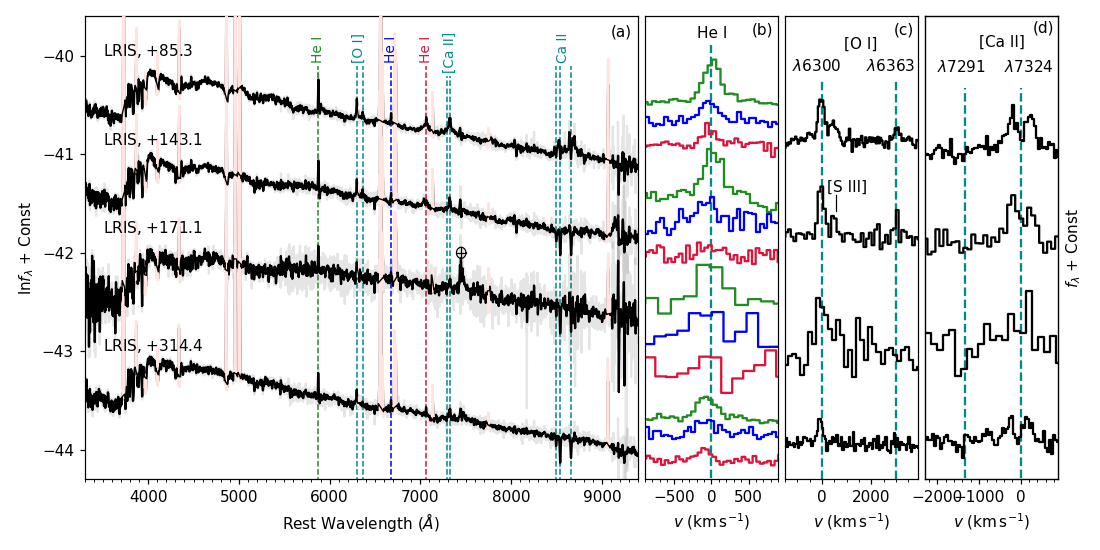

In [38]:
    fig = plt.figure(figsize=(10,5))
    gs = fig.add_gridspec(nrows=1, ncols=7)
    ax = fig.add_subplot(gs[0, 0:4]) 
    ax1 = fig.add_subplot(gs[0, 4]) 
    ax2 = fig.add_subplot(gs[0, 5]) 
    ax3 = fig.add_subplot(gs[0, 6]) 
    
    late_major(ax)
    late_minor1(ax1)
    late_minor2(ax2)
    late_minor3(ax3)
    
    ax.text(9100, -39.8, "(a)", color = "k")
    ax1.text(550, 3.87, "(b)", color = "k")
    ax2.text(2900, 1.395, "(c)", color = "k")
    ax3.text(300, 1.128, "(d)", color = "k")

    plt.tight_layout(w_pad = -1.2)
    plt.savefig('../paper/figures/spectra_late.pdf')

### Measure equivalent width of He II

In [40]:
line4 = measure_line_index(dt4["wave_rest"], dt4["spec_obs"], plotfig=False)
line3 = measure_line_index(dt3["wave_rest"], dt3["spec_obs"], plotfig=False)
line1 = measure_line_index(dt1["wave_rest"], dt1["spec_obs"], plotfig=False)

In [41]:
print ("LT -1.1d, %.2f +- %.2f"%(line4['EW_int'], line4['EW_int_err']))
print ("LT -0.1d, %.2f +- %.2f"%(line3['EW_int'], line3['EW_int_err']))
print ("LRIS +0.4d, %.2f +- %.2f"%(line1['EW_int'], line1['EW_int_err']))

LT -1.1d, -7.56 +- 1.00
LT -0.1d, -2.66 +- 1.07
LRIS +0.4d, -3.77 +- 0.18


### Measure line velocity

In [42]:
from scipy.signal import medfilt

<IPython.core.display.Javascript object>


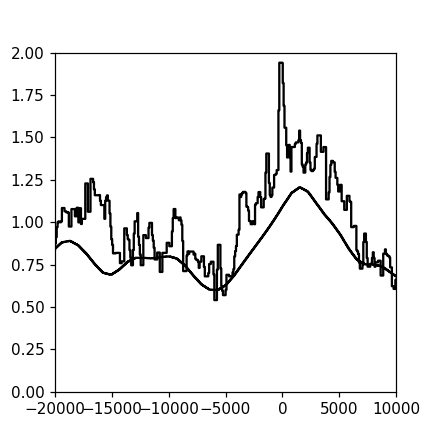

(0.0, 2.0)

In [43]:
    plt.figure(figsize= (4,4))
    ax = plt.subplot(111)
    wv = HeI_list[2]
    vv5, yy5 = get_vvyy(dt5, wv)
    vv2, yy2 = get_vvyy(dt2, wv)
    yy2_ = medfilt(yy2, 9)
    
    multi = 2e+16
    
    ax.plot(vv5, yy5*multi, 'k', zorder=2)
    ax.plot(vv2, yy2_*multi-2.5, 'k', zorder=2)
    ax.set_xlim(-20000, 10000)
    ax.set_ylim(0, 2)

In [44]:
velosity2 = vv2
flux2 = yy2*multi
velosity5 = vv5
flux5 = yy5*multi

In [45]:
line_info = {'line_shoulder_left': (-12600, -9800),
             'line_shoulder_right': (-1300, 1800),
             'line_fit': (-8000, -3000)}

line width = 1960.53 +- 882.45 km/s
line center = -5552.19 +- 66.28 km/s


<IPython.core.display.Javascript object>


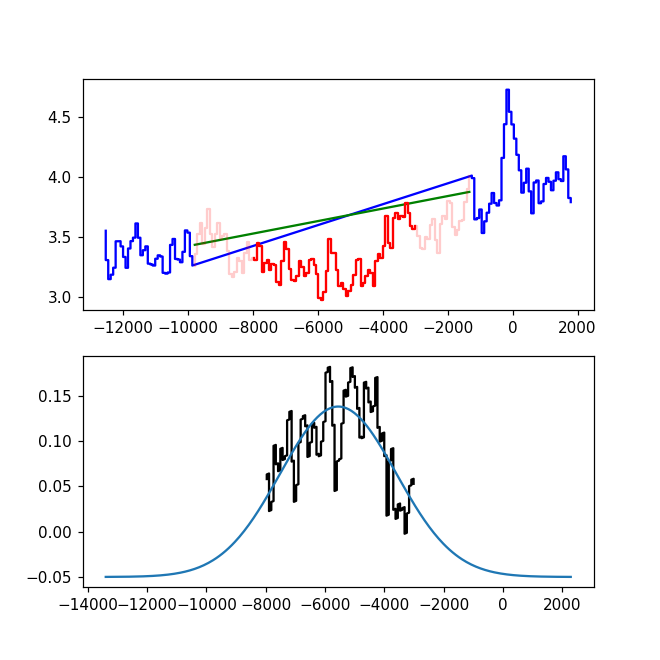

line center = -5855.41 +- 54.28 km/s


In [46]:
measure_abs_velocity(velosity2, flux2, line_info = line_info, sigma_guess = 2000, line_center = -6000, 
                     line_bound_width = 1000, plotfig=True)

line width = 2166.48 +- 100.01 km/s
line center = -5596.18 +- 5.59 km/s


<IPython.core.display.Javascript object>


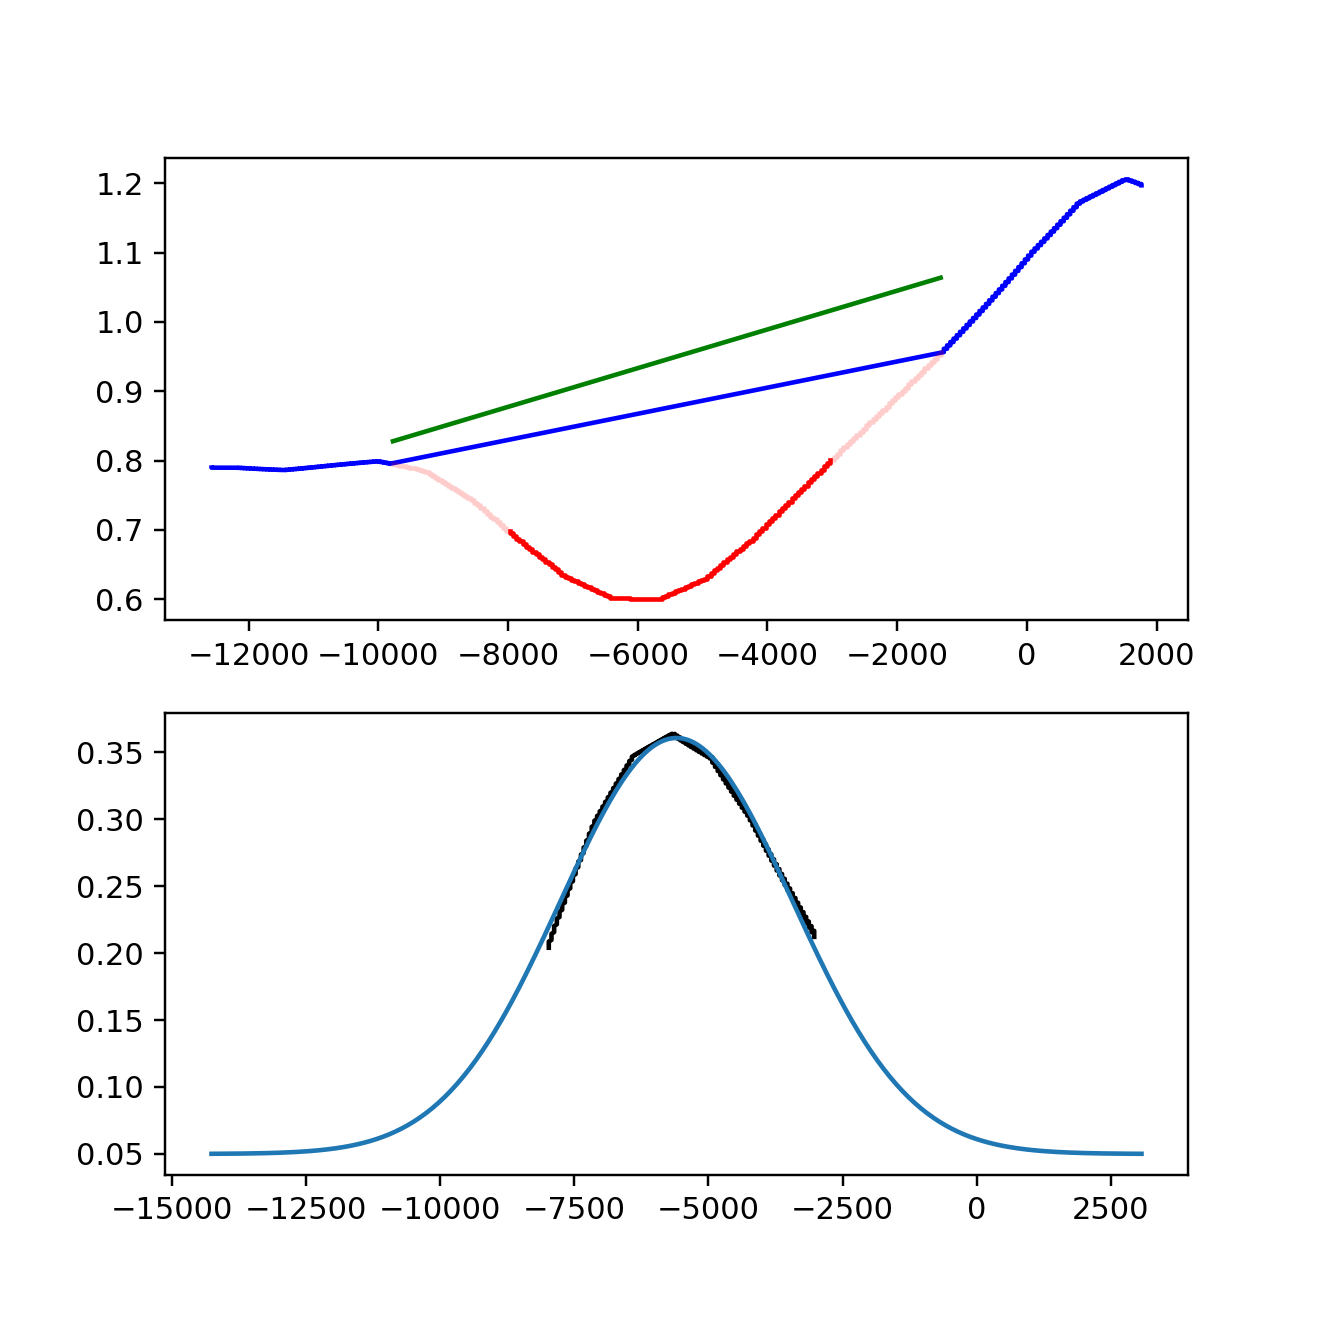

line center = -6008.86 +- 7.06 km/s


In [49]:
measure_abs_velocity(velosity5, flux5, line_info = line_info, sigma_guess = 2000, line_center = -6000, 
                     line_bound_width = 1000, plotfig=True)

### Measure FWHM of early spec

In [9]:
HeI_list

array([4472, 5016, 5875, 6678, 7065])

<IPython.core.display.Javascript object>


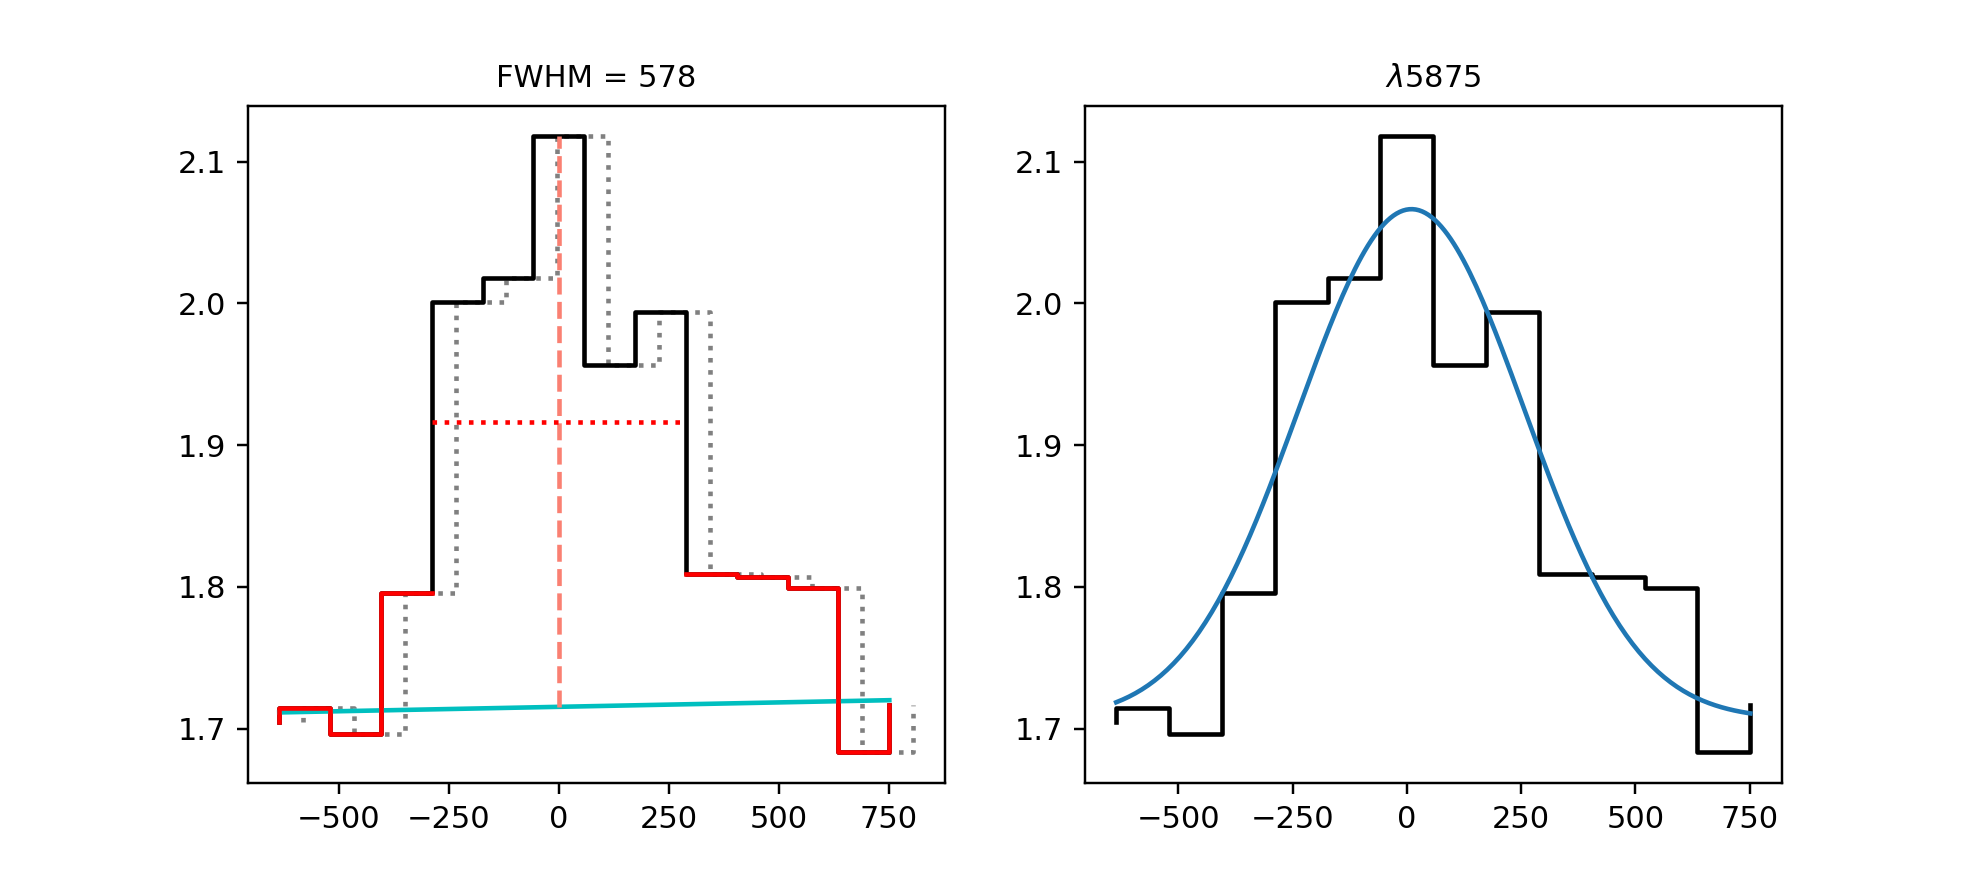

line width = 247.28 +- 36.72 km/s
line center = 10.27 +- 22.43 km/s
FWHM = 582 +- 86 km/s


In [20]:
measure_FWHM(dt1, HeI_list[2], init_lim_left = -680, init_lim_right = 900, lim_cont = 600)

<IPython.core.display.Javascript object>


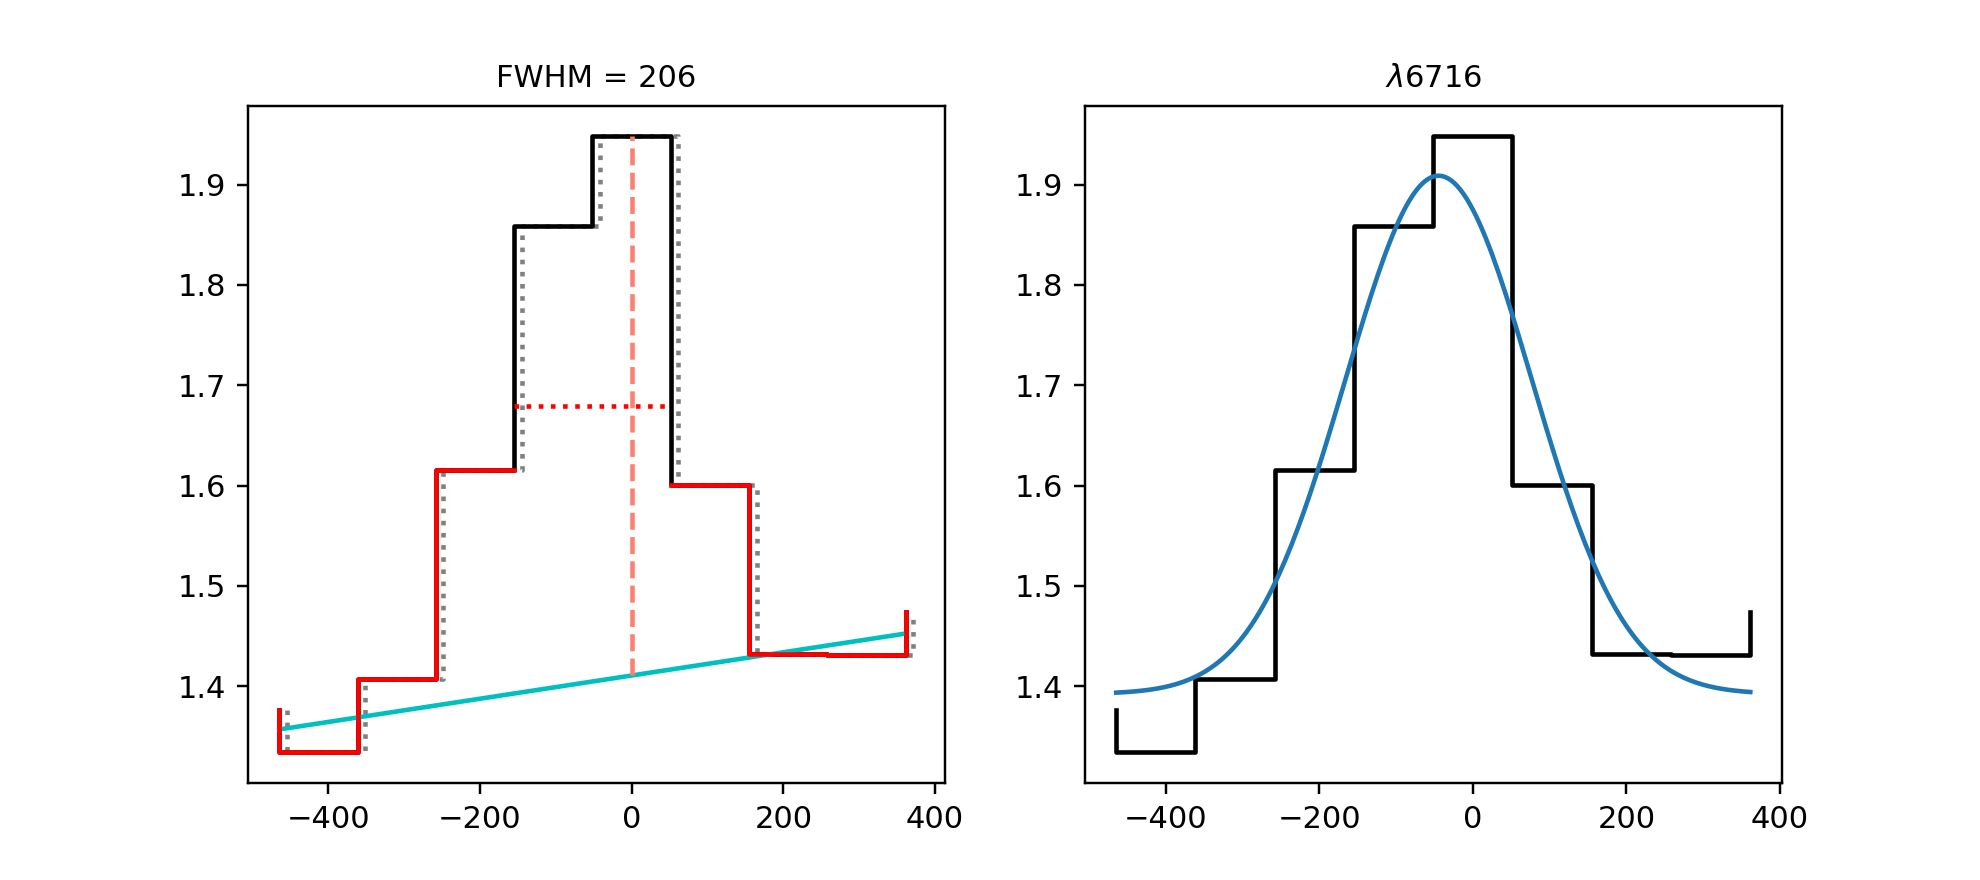

line width = 121.43 +- 22.14 km/s
line center = -44.65 +- 16.74 km/s
FWHM = 285 +- 52 km/s


In [22]:
measure_FWHM(dt1, SII_list[0], init_lim_right = 400)

<IPython.core.display.Javascript object>


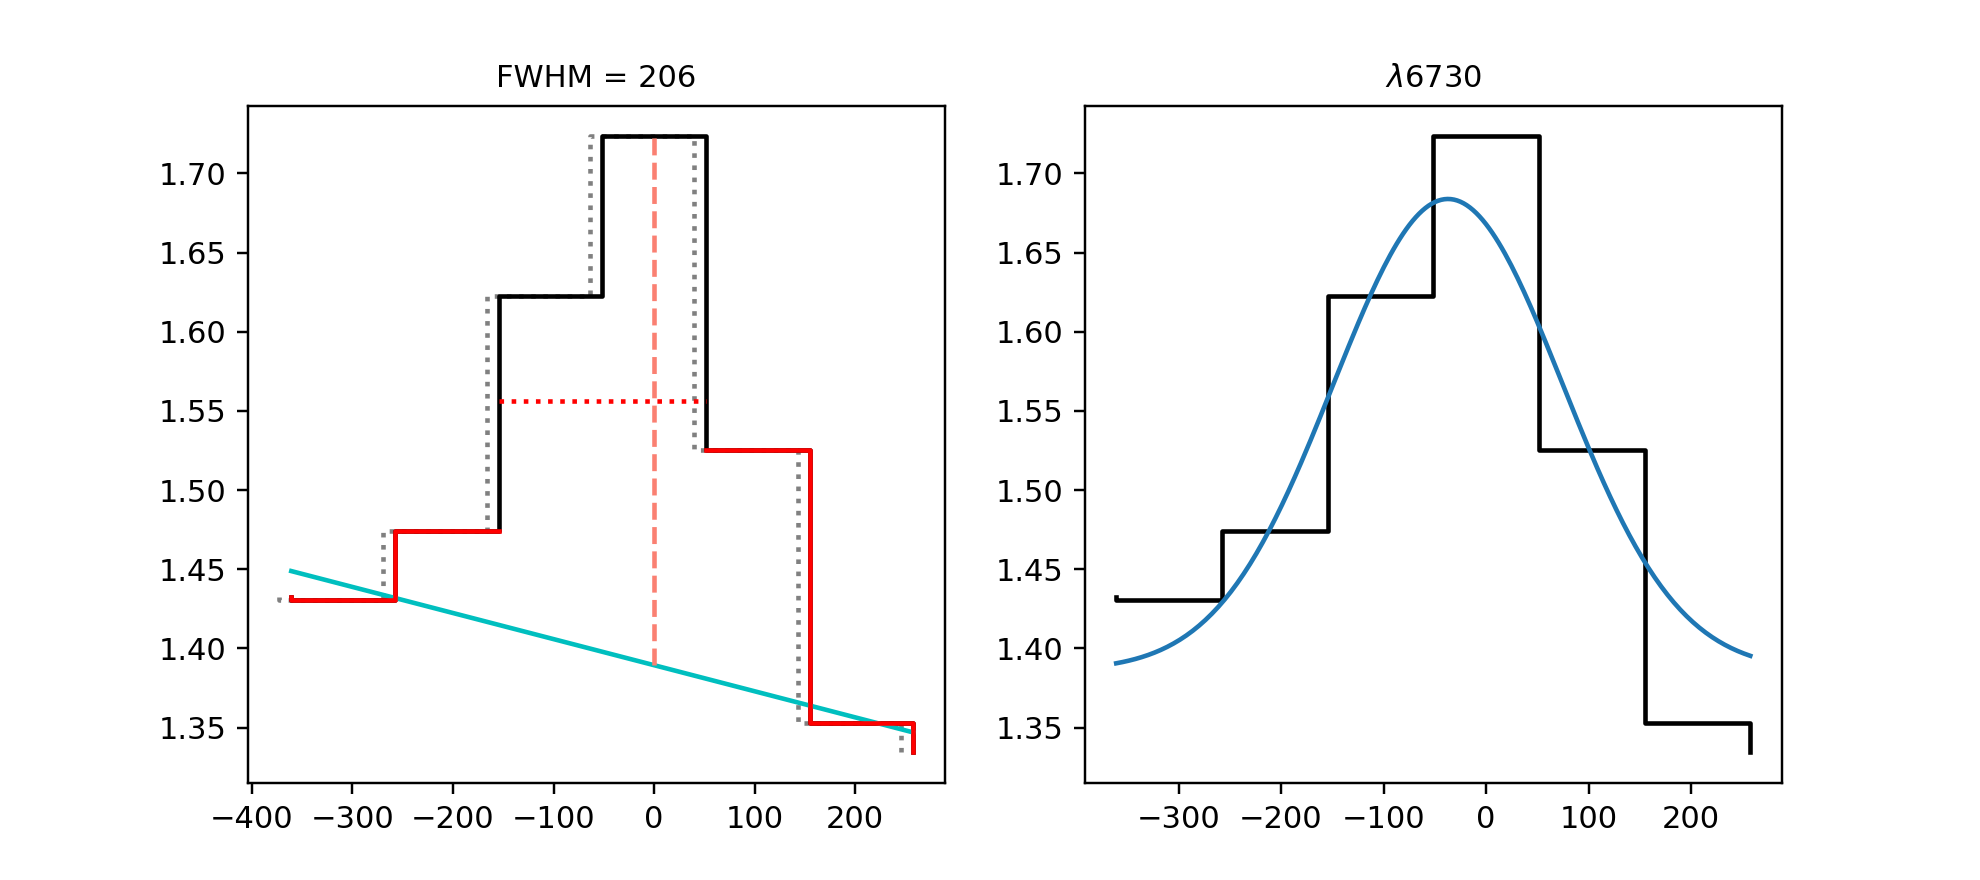

line width = 111.96 +- 33.21 km/s
line center = -37.14 +- 21.55 km/s
FWHM = 263 +- 78 km/s


In [29]:
measure_FWHM(dt1, SII_list[1], init_lim_left = -400, init_lim_right = 300, lim_cont = 250)

<IPython.core.display.Javascript object>


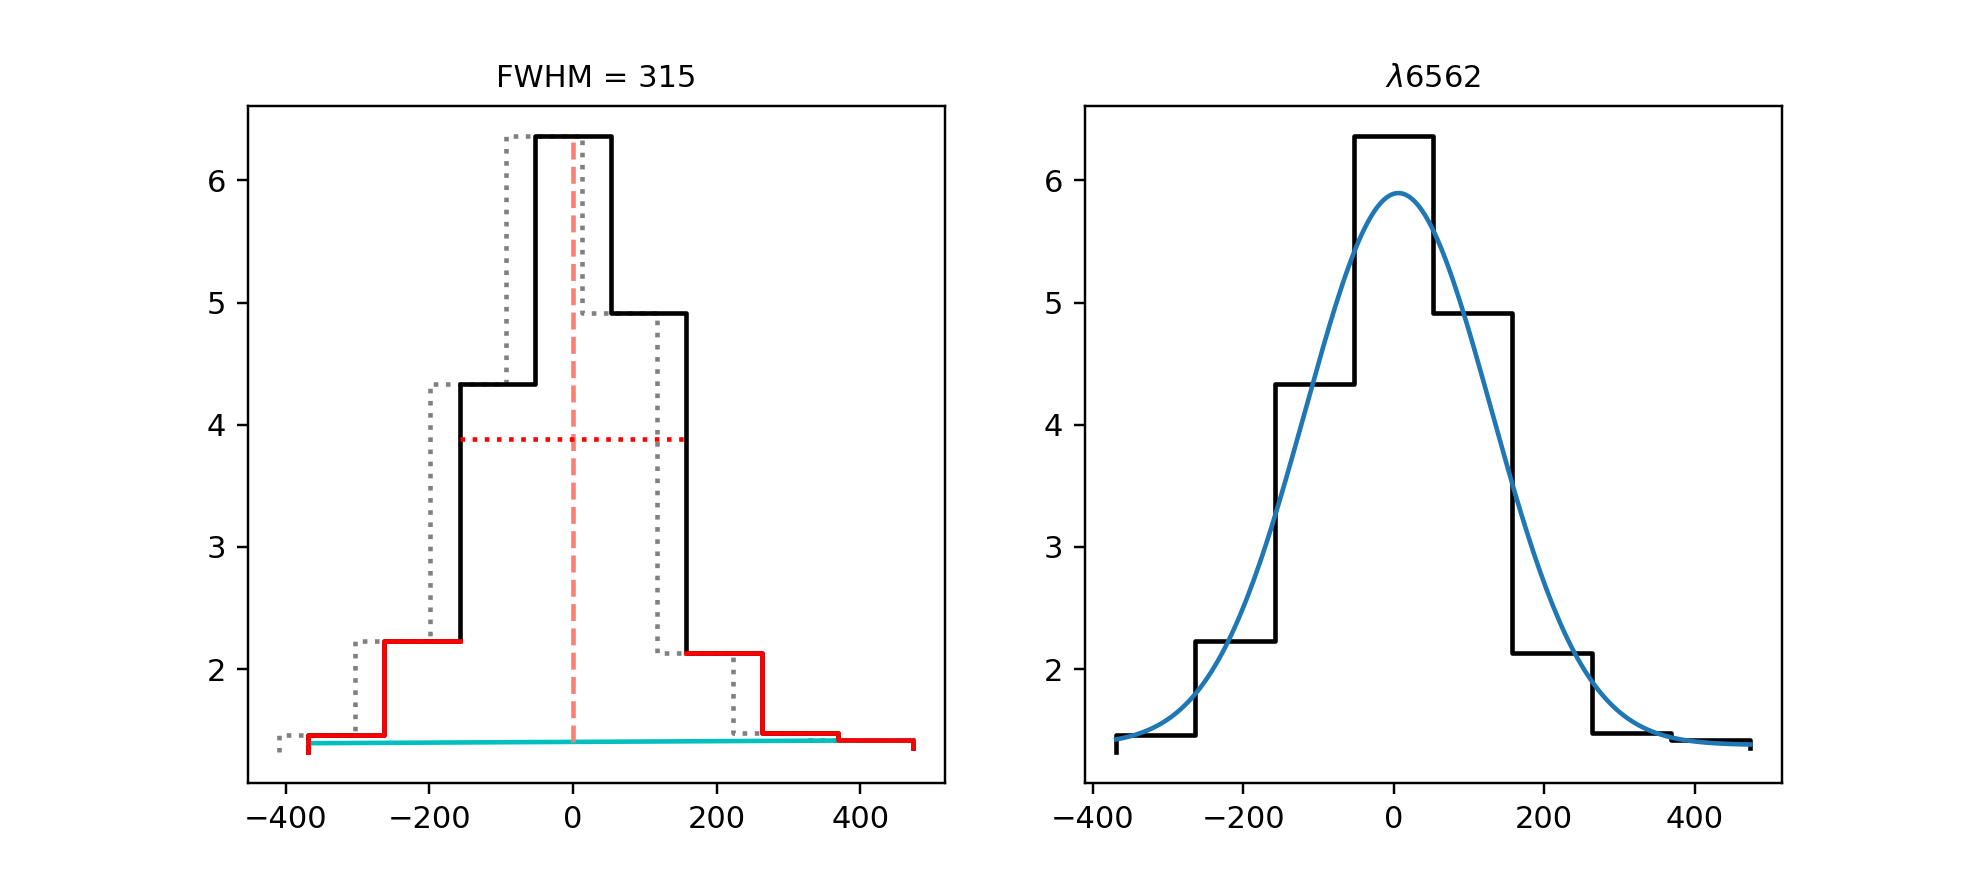

line width = 123.69 +- 20.89 km/s
line center = 6.43 +- 15.83 km/s
FWHM = 291 +- 49 km/s


In [30]:
measure_FWHM(dt1, H_list[-1])

In [31]:
HeII_list

array([4685.682])

<IPython.core.display.Javascript object>


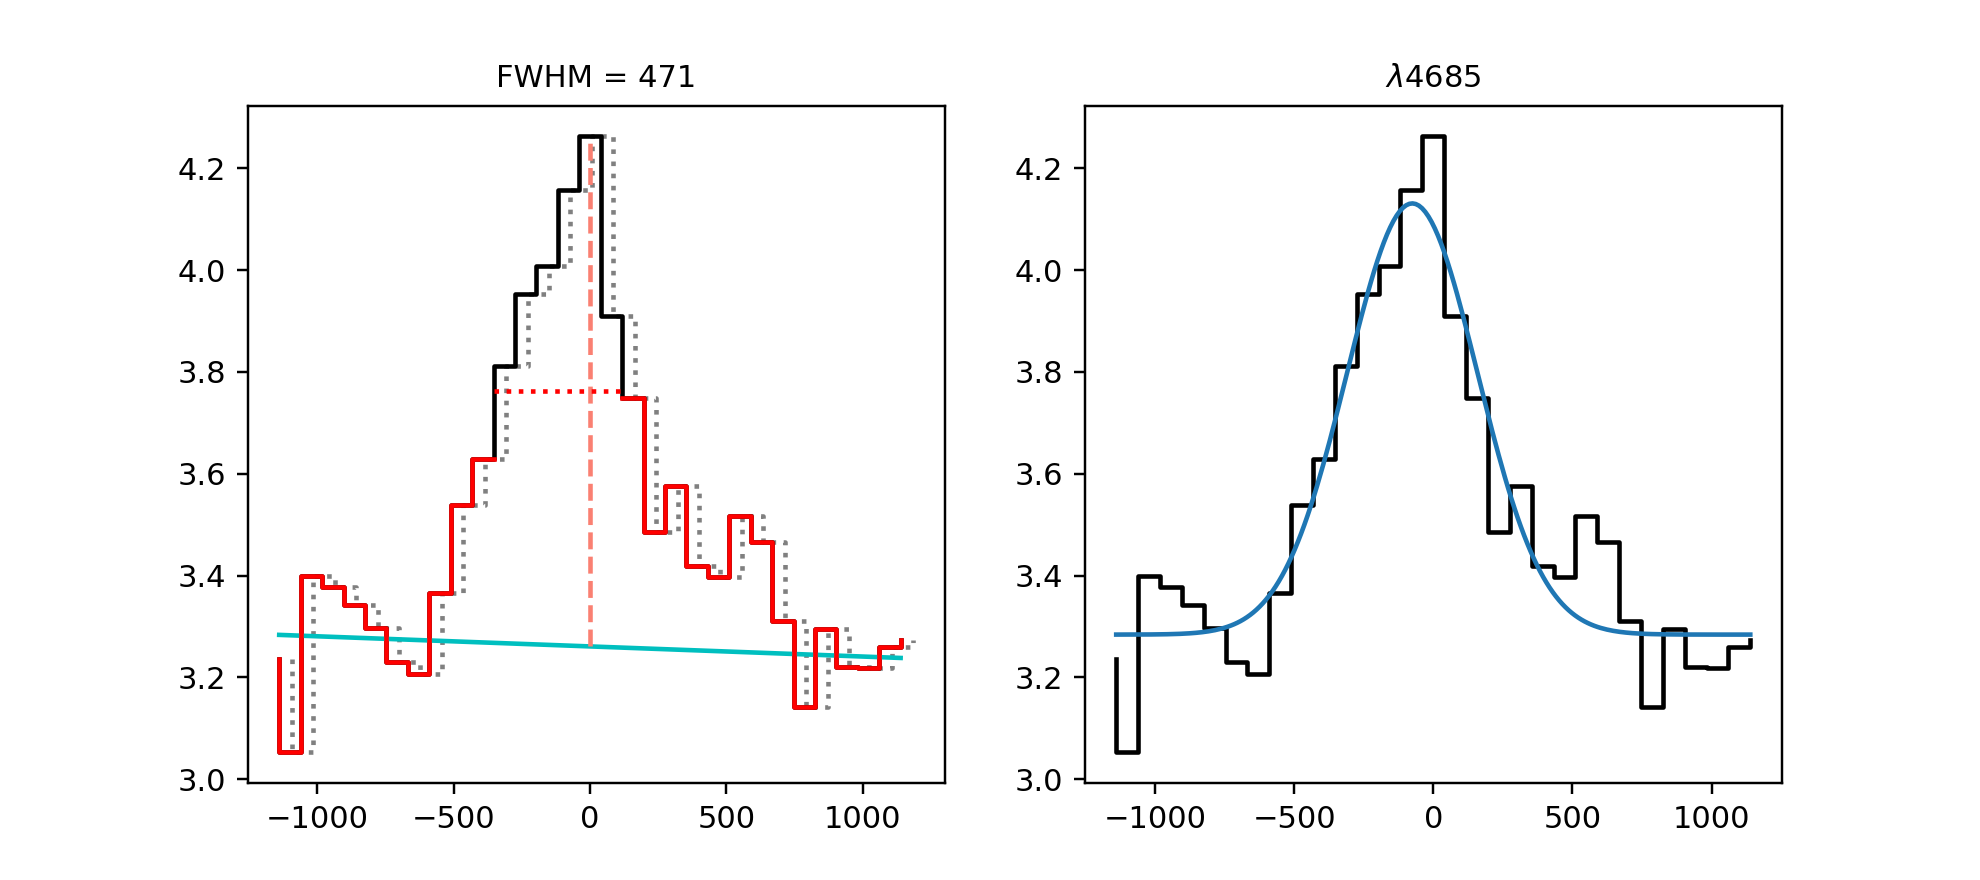

line width = 234.49 +- 15.54 km/s
line center = -75.59 +- 13.25 km/s
FWHM = 552 +- 36 km/s


In [39]:
measure_FWHM(dt1, HeII_list[0], init_lim_left = -1100, init_lim_right = 1200, lim_cont = 700)